In [1]:
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
import random

from gensim.models import Word2Vec

from sklearn.decomposition import IncrementalPCA   
from sklearn.manifold import TSNE  

In [3]:
# read a file you have stored locally
# I added the Hunger Games for simplicity
file = open("carroll-alice.txt", 'r').read()

# first, remove unwanted new line and tab characters from the text
for char in ["\n", "\r", "\d", "\t"]:
    file = file.replace(char, " ")

# check
print(file[:100])

FileNotFoundError: [Errno 2] No such file or directory: 'carroll-alice.txt'

In [4]:
# read a file you have stored locally
# I added the Hunger Games for simplicity
file = open("carroll-alice.txt", 'r').read()

# first, remove unwanted new line and tab characters from the text
for char in ["\n", "\r", "\d", "\t"]:
    file = file.replace(char, " ")

# check
print(file[:100])

[Alice's Adventures in Wonderland by Lewis Carroll 1865]  CHAPTER I. Down the Rabbit-Hole  Alice was


In [5]:
# this is simplified for demonstration
def sample_clean_text(text: str):
    # step 1: tokenize the text into sentences
    sentences = nltk.sent_tokenize(text)

    # step 2: tokenize each sentence into words
    tokenized_sentences = [nltk.word_tokenize(sent) for sent in sentences]

    # step 3: convert each word to lowercase
    tokenized_text = [[word.lower() for word in sent] for sent in tokenized_sentences]
    
    # return your tokens
    return tokenized_text

# call the function
tokens = sample_clean_text(text = file)

# check
print(tokens[:10])

[['[', 'alice', "'s", 'adventures', 'in', 'wonderland', 'by', 'lewis', 'carroll', '1865', ']', 'chapter', 'i', '.'], ['down', 'the', 'rabbit-hole', 'alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', ',', "'and", 'what', 'is', 'the', 'use', 'of', 'a', 'book', ',', "'", 'thought', 'alice', "'without", 'pictures', 'or', 'conversation', '?', "'"], ['so', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',', 'for', 'the', 'hot', 'day', 'made', 'her', 'feel', 'very', 'sleepy', 'and', 'stupid', ')', ',', 'whether', 'the', 'pleasure', 'of', 'making', 'a', 'daisy-chain', 'would', 'be', 'worth', 'the', 'trouble', 'of', 'getting', 'up', 'and', 'p

In [6]:
model = Word2Vec(tokens,vector_size=100)

In [7]:
model.wv.key_to_index

{',': 0,
 'the': 1,
 "'": 2,
 '.': 3,
 'and': 4,
 'to': 5,
 'a': 6,
 'she': 7,
 'i': 8,
 'it': 9,
 'of': 10,
 'said': 11,
 '!': 12,
 'alice': 13,
 'was': 14,
 'you': 15,
 'in': 16,
 'that': 17,
 '--': 18,
 'as': 19,
 'her': 20,
 ':': 21,
 "n't": 22,
 'at': 23,
 '?': 24,
 "'s": 25,
 ';': 26,
 'on': 27,
 'had': 28,
 'with': 29,
 'all': 30,
 'be': 31,
 'for': 32,
 'so': 33,
 'very': 34,
 'they': 35,
 'not': 36,
 'this': 37,
 'but': 38,
 'little': 39,
 'do': 40,
 'he': 41,
 'is': 42,
 'out': 43,
 'what': 44,
 'down': 45,
 'one': 46,
 'up': 47,
 'his': 48,
 'about': 49,
 'would': 50,
 'them': 51,
 'know': 52,
 'there': 53,
 'were': 54,
 'could': 55,
 'have': 56,
 'like': 57,
 'herself': 58,
 'went': 59,
 'again': 60,
 'then': 61,
 'no': 62,
 'queen': 63,
 'if': 64,
 'did': 65,
 'thought': 66,
 'when': 67,
 'or': 68,
 "''": 69,
 'time': 70,
 'me': 71,
 'see': 72,
 'into': 73,
 'off': 74,
 'king': 75,
 'your': 76,
 '*': 77,
 "'m": 78,
 'turtle': 79,
 'began': 80,
 'by': 81,
 'its': 82,
 "'ll"

In [8]:
model.wv.get_vector("alice", norm=True)

KeyError: "Key 'capitol' not present"

In [9]:
model.wv.get_vector("alice", norm=True)

array([-0.03686217,  0.04075047, -0.02609905,  0.02617337,  0.01673777,
       -0.18759605,  0.09894553,  0.2614223 , -0.09730216, -0.09168454,
        0.00405867, -0.19517948, -0.02181011,  0.03577551, -0.00338368,
       -0.06426921,  0.07745586, -0.13957246, -0.00864112, -0.23078014,
        0.10281576,  0.08900964,  0.07079399, -0.07376342, -0.02584271,
        0.00648348, -0.07341146, -0.07265075, -0.11318617,  0.07913384,
        0.08741982,  0.00148013,  0.1415754 , -0.16959698, -0.10675887,
        0.20459963,  0.00858671, -0.10411713, -0.07446089, -0.13197994,
        0.09565642, -0.08987007, -0.01495818,  0.00914126,  0.12350913,
       -0.04709197, -0.1164104 , -0.10110345,  0.07379207,  0.09921322,
        0.04264027, -0.10302304,  0.04286507,  0.00539758, -0.06651596,
        0.03109744,  0.00949783, -0.03115549, -0.15211044,  0.01518367,
        0.04547398, -0.05133945,  0.02015894, -0.0094426 , -0.08805432,
        0.13239507,  0.04276005,  0.08195602, -0.16659416,  0.12

In [10]:
model.wv.get_vector("rabbit", norm=True)

array([-0.03278732,  0.03836986, -0.02572512,  0.02938434,  0.01652416,
       -0.19029613,  0.10335965,  0.267699  , -0.09081123, -0.09065454,
        0.01434399, -0.19408225, -0.01876464,  0.04408117, -0.00334596,
       -0.0676597 ,  0.07262144, -0.13863944, -0.01069522, -0.23522238,
        0.10030277,  0.0859406 ,  0.06588544, -0.07995463, -0.03226305,
        0.0055731 , -0.06462586, -0.07243093, -0.10680491,  0.07477763,
        0.08625028, -0.00092444,  0.13681805, -0.16163835, -0.11253919,
        0.20011403,  0.01579929, -0.10823073, -0.07499035, -0.13143703,
        0.10264411, -0.08512654, -0.02069522,  0.01117011,  0.12615466,
       -0.04736942, -0.11269626, -0.10744844,  0.07131738,  0.10145234,
        0.03853974, -0.10883705,  0.04900645,  0.00788158, -0.06568208,
        0.0282297 ,  0.00416438, -0.03774404, -0.15849482,  0.01429474,
        0.04488612, -0.05235872,  0.02396677, -0.01665852, -0.08825944,
        0.12768921,  0.03759374,  0.07966279, -0.1704343 ,  0.13

In [11]:
model = Word2Vec(tokens,vector_size=500)

In [12]:
model.wv.key_to_index

{',': 0,
 'the': 1,
 "'": 2,
 '.': 3,
 'and': 4,
 'to': 5,
 'a': 6,
 'she': 7,
 'i': 8,
 'it': 9,
 'of': 10,
 'said': 11,
 '!': 12,
 'alice': 13,
 'was': 14,
 'you': 15,
 'in': 16,
 'that': 17,
 '--': 18,
 'as': 19,
 'her': 20,
 ':': 21,
 "n't": 22,
 'at': 23,
 '?': 24,
 "'s": 25,
 ';': 26,
 'on': 27,
 'had': 28,
 'with': 29,
 'all': 30,
 'be': 31,
 'for': 32,
 'so': 33,
 'very': 34,
 'they': 35,
 'not': 36,
 'this': 37,
 'but': 38,
 'little': 39,
 'do': 40,
 'he': 41,
 'is': 42,
 'out': 43,
 'what': 44,
 'down': 45,
 'one': 46,
 'up': 47,
 'his': 48,
 'about': 49,
 'would': 50,
 'them': 51,
 'know': 52,
 'there': 53,
 'were': 54,
 'could': 55,
 'have': 56,
 'like': 57,
 'herself': 58,
 'went': 59,
 'again': 60,
 'then': 61,
 'no': 62,
 'queen': 63,
 'if': 64,
 'did': 65,
 'thought': 66,
 'when': 67,
 'or': 68,
 "''": 69,
 'time': 70,
 'me': 71,
 'see': 72,
 'into': 73,
 'off': 74,
 'king': 75,
 'your': 76,
 '*': 77,
 "'m": 78,
 'turtle': 79,
 'began': 80,
 'by': 81,
 'its': 82,
 "'ll"

In [13]:
model.wv.get_vector("alice", norm=True)

array([ 5.81563488e-02,  6.05684593e-02,  8.36031660e-02,  4.46565636e-02,
       -7.64220115e-03, -8.29128474e-02,  1.47225452e-03,  1.10983536e-01,
        1.35899521e-02,  3.23264636e-02, -1.34411836e-02,  4.57452275e-02,
        5.14668971e-02,  2.42363140e-02,  9.25868563e-03, -6.94569647e-02,
       -4.81288880e-02, -3.59089896e-02, -3.76672000e-02, -3.92338708e-02,
        2.88560744e-02, -1.16525507e-02, -9.68958717e-03, -1.78983882e-02,
        2.76043471e-02,  1.73501857e-02,  3.48861367e-02,  2.03152169e-02,
       -8.16910416e-02,  1.46836729e-03,  1.93284061e-02,  2.87400763e-02,
       -3.54253165e-02, -3.96194495e-02,  2.94630285e-02,  3.38595770e-02,
        2.91289818e-02, -8.37630928e-02, -4.13607582e-02, -1.07876539e-01,
       -6.09402396e-02, -2.12844741e-02, -1.16380706e-01,  3.35453711e-02,
       -4.49228659e-02, -6.68156669e-02, -3.72589156e-02,  1.05298692e-02,
       -1.50391338e-02, -4.59107338e-03,  7.46195810e-03, -1.69040691e-02,
        6.32757368e-03, -

In [14]:
model.wv.similarity('alice', 'girl')

KeyError: "Key 'girl' not present"

In [15]:
model.wv.most_similar('alice')

[('it', 0.9998971819877625),
 (':', 0.9998888969421387),
 ('but', 0.9998868107795715),
 (';', 0.999886155128479),
 ('that', 0.9998844861984253),
 ('very', 0.999880850315094),
 ('when', 0.9998801350593567),
 ('so', 0.9998775124549866),
 ('to', 0.9998762011528015),
 ('he', 0.9998740553855896)]

In [17]:
model.wv.similarity('alice', 'it')

0.9998971

In [18]:
model.wv.similarity('alice', 'he')

0.9998741

In [19]:
model.wv.similarity('alice', 'but')

0.9998867

In [20]:
model.wv.similarity('alice', 'it')

0.9998971

In [22]:
def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)

In [23]:
def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)

In [24]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [25]:
#establish an empty dictionary
embeddings_dict = {}

#open the file and read it into the dictionary
with open("glove.6B/glove.6B.100d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

FileNotFoundError: [Errno 2] No such file or directory: 'glove.6B/glove.6B.100d.txt'

In [26]:
#establish an empty dictionary
embeddings_dict = {}

#open the file and read it into the dictionary
with open("glove.6B.100d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [27]:
#find the Euclidean distance between the vectors for words and 1 or more other words.
#sort the resulting word distances.
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: 
                  spatial.distance.euclidean(embeddings_dict[word], embedding))

In [28]:
print(find_closest_embeddings(
    embeddings_dict["dog"]
)[:20])

['dog', 'cat', 'dogs', 'puppy', 'pet', 'horse', 'pig', 'cats', 'animal', 'rabbit', 'boy', 'goat', 'monkey', 'rat', 'hound', 'breed', 'canine', 'sled', 'pets', 'puppies']


In [29]:
print(find_closest_embeddings(
    embeddings_dict["cat"]
)[:20])

['cat', 'dog', 'rabbit', 'cats', 'monkey', 'puppy', 'pet', 'dogs', 'rat', 'mouse', 'spider', 'elephant', 'ghost', 'pig', 'monster', 'ape', 'parrot', 'squirrel', 'kitten', 'hound']


In [30]:
print(find_closest_embeddings(
    embeddings_dict["girl"]
)[:20])

['girl', 'boy', 'woman', 'girls', 'mother', 'teenager', 'girlfriend', 'child', 'teenage', 'teen', 'boys', 'kid', 'mom', 'baby', 'man', 'couple', 'sister', 'boyfriend', 'toddler', 'ager']


In [31]:
print(find_closest_embeddings(
    embeddings_dict["house"]
)[:20])

['house', 'office', 'room', 'capitol', 'houses', 'mansion', 'once', 'home', 'senate', 'building', 'door', 'came', 'where', 'congressional', 'clinton', 'turned', 'floor', 'hill', 'now', 'next']


In [32]:
print(find_closest_embeddings(
    embeddings_dict["bike"]
)[:20])

['bike', 'bicycle', 'bikes', 'ride', 'rides', 'riding', 'motorcycle', 'biking', 'bicycles', 'horseback', 'rode', 'riders', 'walking', 'snowmobile', 'wagon', 'cart', 'skateboard', 'bicycling', 'motorbike', 'driving']


In [33]:
print(find_closest_embeddings(
    embeddings_dict["pool"]
)[:20])

['pool', 'pools', 'swimming', 'room', 'table', 'playground', 'outdoor', 'tub', 'stands', 'tables', 'addition', 'filled', 'goals_none', 'jacuzzi', 'floor', 'fill', 'setting', 'nasdaq100', 'splash', 'placed']


In [34]:
print(find_closest_embeddings(
    embeddings_dict["sad"]
)[:20])

['sad', 'sorry', 'awful', 'tragic', 'horrible', 'heartbreaking', 'unfortunate', 'pathetic', 'scary', 'happy', 'poignant', 'shocking', 'sorrowful', 'terrible', 'ugly', 'sadly', 'lonely', 'unhappy', 'confused', 'depressing']


In [35]:
print(find_closest_embeddings(
    embeddings_dict["art"]
)[:20])

['art', 'arts', 'museum', 'sculpture', 'works', 'photography', 'contemporary', 'painting', 'gallery', 'collection', 'architecture', 'exhibit', 'exhibition', 'artist', 'collections', 'culture', 'architectural', 'artwork', 'paintings', 'artistic']


In [36]:
print(find_closest_embeddings(
    embeddings_dict["book"]
)[:20])

['book', 'books', 'novel', 'wrote', 'essay', 'author', 'biography', 'story', 'published', 'memoir', 'titled', 'written', 'autobiography', 'writing', 'publication', 'illustrated', 'describes', 'fiction', 'read', 'novels']


In [37]:
print(find_closest_embeddings(
    embeddings_dict["computer"]
)[:20])

['computer', 'computers', 'software', 'technology', 'hardware', 'pc', 'computing', 'electronic', 'laptop', 'desktop', 'internet', 'systems', 'web', 'applications', 'user', 'digital', 'devices', 'ibm', 'multimedia', 'virtual']


In [38]:
print(find_closest_embeddings(
    embeddings_dict["code"]
)[:20])

['code', 'codes', 'rules', 'defines', 'instance', 'qnix', 'system', 'example', 'standard', 'specifies', 'regulations', 'defined', 'standards', 'allows', 'file', 'refers', 'introduced', 'reference', 'uses', 'requires']


In [39]:
print(find_closest_embeddings(
    embeddings_dict["rose"]
)[:20])

['rose', 'fell', 'climbed', 'surged', 'dropped', 'jumped', 'slipped', 'soared', 'tumbled', 'dipped', 'gained', 'risen', 'shares', 'falling', 'slid', 'slumped', 'declined', 'rise', 'plummeted', 'plunged']


In [40]:
print(find_closest_embeddings(
    embeddings_dict["flower"]
)[:20])

['flower', 'flowers', 'leaf', 'floral', 'roses', 'petals', 'garden', 'lavender', 'fruit', 'bloom', 'buds', 'jasmine', 'blossoms', 'purple', 'lily', 'nursery', 'blossom', 'tree', 'shade', 'clover']


In [41]:
print(find_closest_embeddings(
    embeddings_dict["dog"] + embeddings_dict["cat"]
)[:20])

['dog', 'cat', 'dogs', 'pet', 'rabbit', 'horse', 'puppy', 'cats', 'monkey', 'animal', 'mouse', 'boy', 'pig', 'rat', 'bird', 'baby', 'duck', 'snake', 'cow', 'goat']


In [42]:
print(find_closest_embeddings(
    embeddings_dict["flower"] + embeddings_dict["water"]
)[:20])

['water', 'flower', 'flowers', 'red', 'natural', 'fruit', 'green', 'garden', 'large', 'dry', 'tree', 'light', 'food', 'small', 'fields', 'fish', 'tea', 'trees', 'yellow', 'sand']


In [43]:
print(find_closest_embeddings(
    embeddings_dict["school"] + embeddings_dict["cat"]
)[:20])

['school', 'college', 'boys', 'boy', 'girls', 'where', 'girl', 'cat', 'dog', 'kids', 'she', 'student', 'home', 'teacher', 'children', 'schools', 'child', 'high', 'one', 'little']


In [44]:
print(find_closest_embeddings(
    embeddings_dict["dog"] + embeddings_dict["cat"] + embeddings_dict["pet"]
)[:20])

['dog', 'pet', 'cat', 'dogs', 'animal', 'cats', 'pets', 'animals', 'puppy', 'baby', 'rabbit', 'mouse', 'cow', 'monkey', 'bird', 'horse', 'pig', 'rat', 'boy', 'duck']


In [45]:
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]
X = np.asarray(vectors)

In [46]:
tsne = TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(X[:1000])

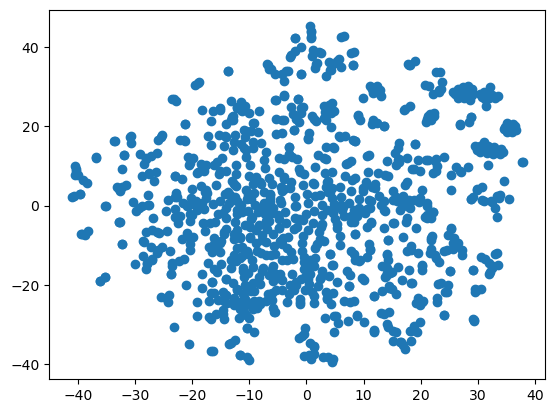

In [47]:
plt.scatter(Y[:, 0], Y[:, 1])

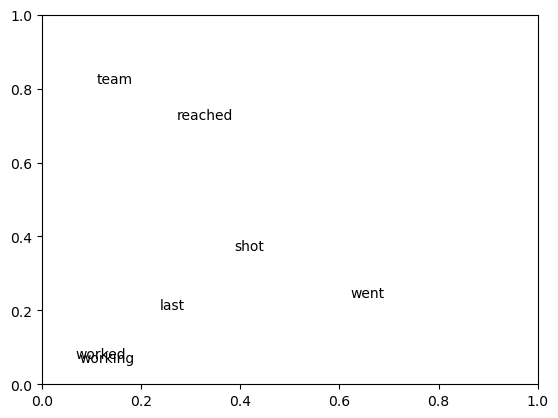

In [48]:
for label, x, y in zip(words, X[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()